Subiectul 1

Un agent este plasat la intamplare pe un grid de 10 x 10 colorat ca in csv
la fiecare pas, el fie ramane in locatia curenta cu o probabilitate de 25%, fie se misca in sus, jos, deapta sau stanga, cu probabilitati egale. doar culoarea locatiei este consemnata de agent la fiecare pas

1. folosind libraria hmmlearn, determinati cel mai probabil drum al agentului pentru culorile observate si probabilitatea acestuia\
2. ce se intampla daca eliminati posibilitatea ca agentul sa ramana pe loc


In [2]:
pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 3.0 MB/s eta 0:00:00


In [16]:
from hmmlearn import hmm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#1
# Dimensiunea gridului
dimensiune_grid = (10, 10)

# Lista de culori predefinite
culori = [
    "red", "blue", "green", "yellow",
    "purple", "orange", "pink", "cyan",
    "brown", "lime"
]

# Citirea gridului
df = pd.read_csv('grid_culori.csv', header=None)
grid_culori = df.to_numpy()

# Generarea secvenței de culori observate
observatii = ["red", "red", "lime", "yellow", "blue"]

# Mapare culori -> indecși
culoare_to_idx = {culoare: idx for idx, culoare in enumerate(culori)}
idx_to_culoare = {idx: culoare for culoare, idx in culoare_to_idx.items()}

# Transformăm secvența de observații în indecși
observatii_idx = [culoare_to_idx[c] for c in observatii]

# Definim stările ascunse ca fiind toate pozițiile din grid (100 de stări)
numar_stari = dimensiune_grid[0] * dimensiune_grid[1]
stari_ascunse = [(i, j) for i in range(dimensiune_grid[0]) for j in range(dimensiune_grid[1])]
stare_to_idx = {stare: idx for idx, stare in enumerate(stari_ascunse)}
idx_to_stare = {idx: stare for stare, idx in stare_to_idx.items()}

# Matrice de tranziție
transitions = np.zeros((numar_stari, numar_stari))
for i, j in stari_ascunse:
    vecini = [
        (i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1)  # sus, jos, stânga, dreapta
    ]
    vecini_valizi = [stare_to_idx[(x, y)] for x, y in vecini if 0 <= x < 10 and 0 <= y < 10]
    transitions[stare_to_idx[(i, j)], vecini_valizi] = 0.25

transitions = transitions / transitions.sum(axis=1, keepdims=True)

# Matrice de emisie
emissions = np.zeros((numar_stari, len(culori)))
for idx, (i, j) in enumerate(stari_ascunse):
    culoare = grid_culori[i, j]
    emissions[idx, culoare_to_idx[culoare]] = 1

# Modelul HMM

model = hmm.MultinomialHMM(n_components=numar_stari, n_trials=1)
model.startprob_ = np.ones(numar_stari) / numar_stari
model.transmat_ = transitions
model.emissionprob_ = emissions


# Rulăm algoritmul Viterbi pentru secvența de observații
observatii_idx = np.array(observatii_idx).reshape(-1, 1)
logprob, secventa_stari = model.decode(observatii_idx, algorithm="viterbi")

# Convertim secvența de stări în poziții din grid
drum = [idx_to_stare[idx] for idx in secventa_stari]

# Vizualizăm drumul pe grid
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(dimensiune_grid[0]):
    for j in range(dimensiune_grid[1]):
        culoare = grid_culori[i, j]
        ax.add_patch(plt.Rectangle((j, dimensiune_grid[0] - i - 1), 1, 1, color=culoare))
        ax.text(j + 0.5, dimensiune_grid[0] - i - 0.5, culoare,
                color="white", ha="center", va="center", fontsize=8, fontweight="bold")

# Evidențiem drumul rezultat
for idx, (i, j) in enumerate(drum):
    ax.add_patch(plt.Circle((j + 0.5, dimensiune_grid[0] - i - 0.5), 0.3, color="black", alpha=0.7))
    ax.text(j + 0.5, dimensiune_grid[0] - i - 0.5, str(idx + 1),
            color="white", ha="center", va="center", fontsize=10, fontweight="bold")

# Setări axă
ax.set_xlim(0, dimensiune_grid[1])
ax.set_ylim(0, dimensiune_grid[0])
ax.set_xticks(range(dimensiune_grid[1]))
ax.set_yticks(range(dimensiune_grid[0]))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(visible=True, color="black", linewidth=0.5)
ax.set_aspect("equal")
plt.title("Drumul rezultat al stărilor ascunse", fontsize=14)
plt.show()

#2
transitions_no_stay = transitions.copy()
n_states = transitions_no_stay.shape[0]
for i in range(n_states):
    transitions_no_stay[i, i] = 0
    transitions_no_stay[i, :] /= transitions_no_stay[i, :].sum()

model_no_stay = hmm.MultinomialHMM(n_components=numar_stari, n_trials=1)
model_no_stay.startprob_ = np.ones(numar_stari) / numar_stari
model_no_stay.transmat_ = transitions_no_stay
model_no_stay.emissionprob_ = emissions

# viterbi
logprob_no_stay, secventa_stari_no_stay = model_no_stay.decode([observatii_idx], algorithm="viterbi")

# drum nou
drum_no_stay = [idx_to_stare[idx] for idx in secventa_stari_no_stay]

print("Drum cand agentul nu poate sa ramana pe loc", drum_no_stay)

https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


ValueError: Size of each quantile should be size of p: received 1, but expected 10.

Subiectul 3

Vreti sa masurati cat de tare este masluita o moneda folosind o abordare bayesiana asa ca aruncati moneda de 10 ori si obtineti s, b, b, b, s, b, s, b, b, b (stema sau ban)


1. determinati parametrii distributiei a posteriori folosind o distributie beta uniforma (alpha = 1, beta = 1) ca distributie a priori. Realizati graficul\
2. faceti din nou un experiment cu 10 aruncari si de data aceasta obtineri s, s, b, s, b, b, s, b, b, s. Determinati distributia a posteriori in fiecare din urmatoarele cazuri

a. distributie a priori este o distributie beta unoforma

b. distributia a priori este o distributie obtinuta in experimentul precedent

Realizati graficele acestor distributii

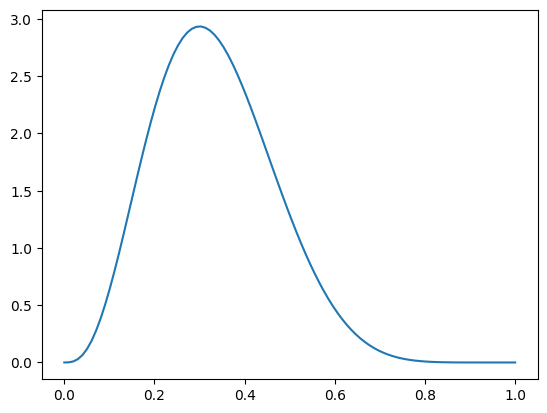

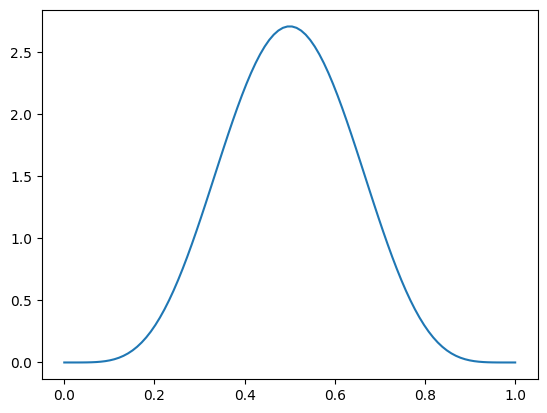

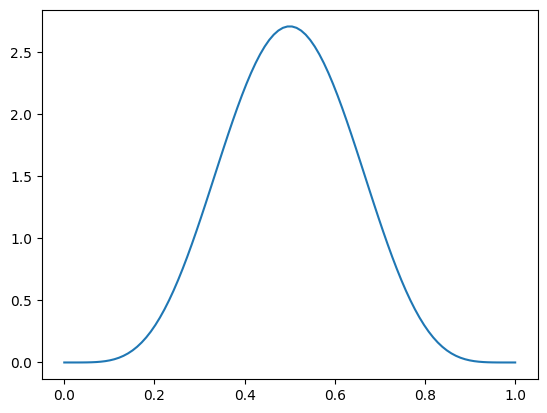

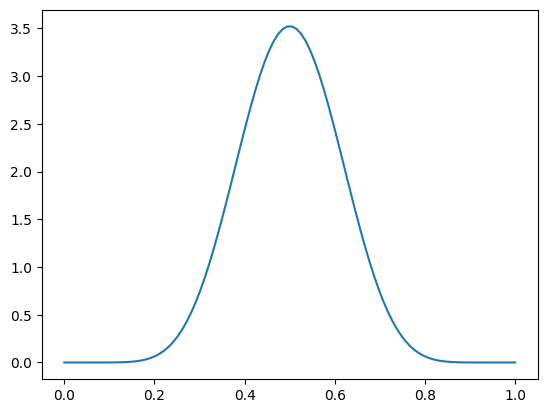

In [8]:
import numpy as np
import matplotlib.pyplot as plot
from scipy.stats import beta

#1
s = 3
b = 7
alpha = 1
beta_ = 1

posterior = beta.pdf(np.linspace(0, 1, 100), s + alpha, b + beta_)

plot.plot(np.linspace(0, 1, 100), posterior)
plot.show()

#2
s = 5
b = 5
alpha = 1
beta_ = 1

posterior = beta.pdf(np.linspace(0, 1, 100), s + alpha, b + beta_)

plot.plot(np.linspace(0, 1, 100), posterior)
plot.show()

#2.a
s = 5
b = 5
alpha = 1
beta_ = 1

posterior = beta.pdf(np.linspace(0, 1, 100), s + alpha, b + beta_)

plot.plot(np.linspace(0, 1, 100), posterior)
plot.show()

#2.b
s = 5
b = 5
alpha = 5
beta_ = 5

posterior = beta.pdf(np.linspace(0, 1, 100), s + alpha, b + beta_)

plot.plot(np.linspace(0, 1, 100), posterior)
plot.show()

Diferenta dintre distributii este datorita faptului ca prima este realizata cu o distributie uniforma beta (cu date a priori), iar cea de a 2a in functie de datele de la punctul 1.

Distributia beta (cu alpha = 1, beta = 1) inseamna ca nu exista nicio preferinta, deci valorile vor fi apropiate, pe cand in ultimul grafic valorile sunt mai variate, fiind bazate pe datele de la punctul 1.
